In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv("IRIS.csv")
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Data Visualization

Text(0.5, 1.0, 'Distribution of Species')

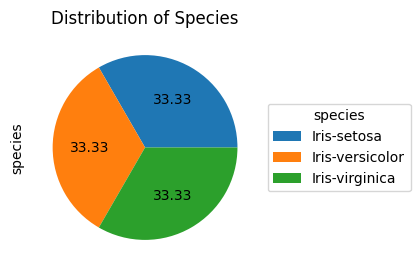

In [4]:
plt.figure(figsize=(5,3))
df["species"].value_counts().plot(kind='pie',autopct='%.2f',labels=None)
plt.legend(df["species"].value_counts().index, title="species", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Distribution of Species")

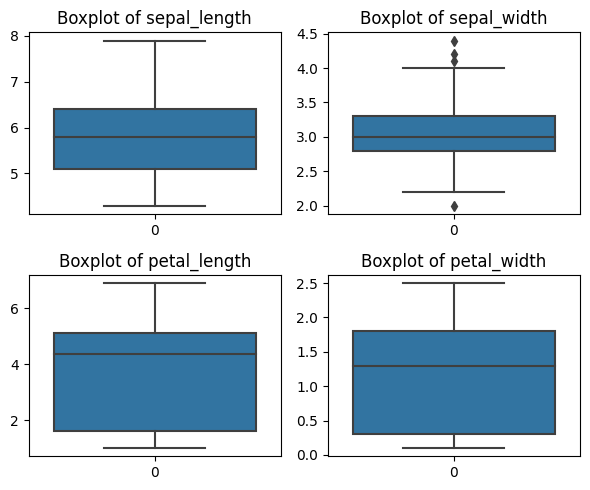

In [5]:
l=['sepal_length','sepal_width','petal_length','petal_width']
plt.figure(figsize=(6,5))
for i in l:
    plt.subplot(2, 2, l.index(i) + 1)   # 2 rows , 2 columns
    sns.boxplot(df[i])
    plt.title(f"Boxplot of {i}")
plt.tight_layout()

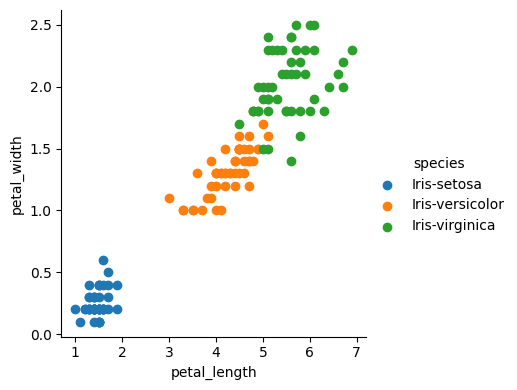

In [6]:
# FaectGrid (to create multiple plots (often of the same type, like scatter plots) arranged in a grid)
sns.FacetGrid(df, hue ="species", height=4, aspect=1).map(plt.scatter, 'petal_length','petal_width').add_legend()

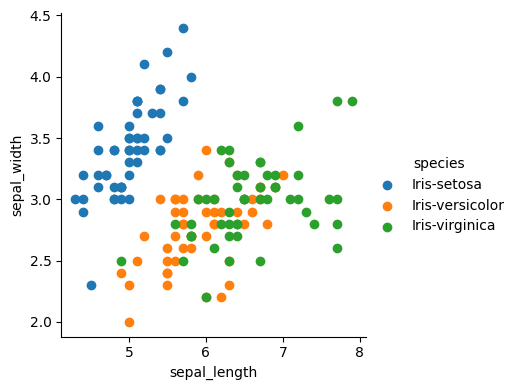

In [7]:
sns.FacetGrid(df, hue ="species", height=4, aspect=1).map(plt.scatter, 'sepal_length','sepal_width').add_legend()

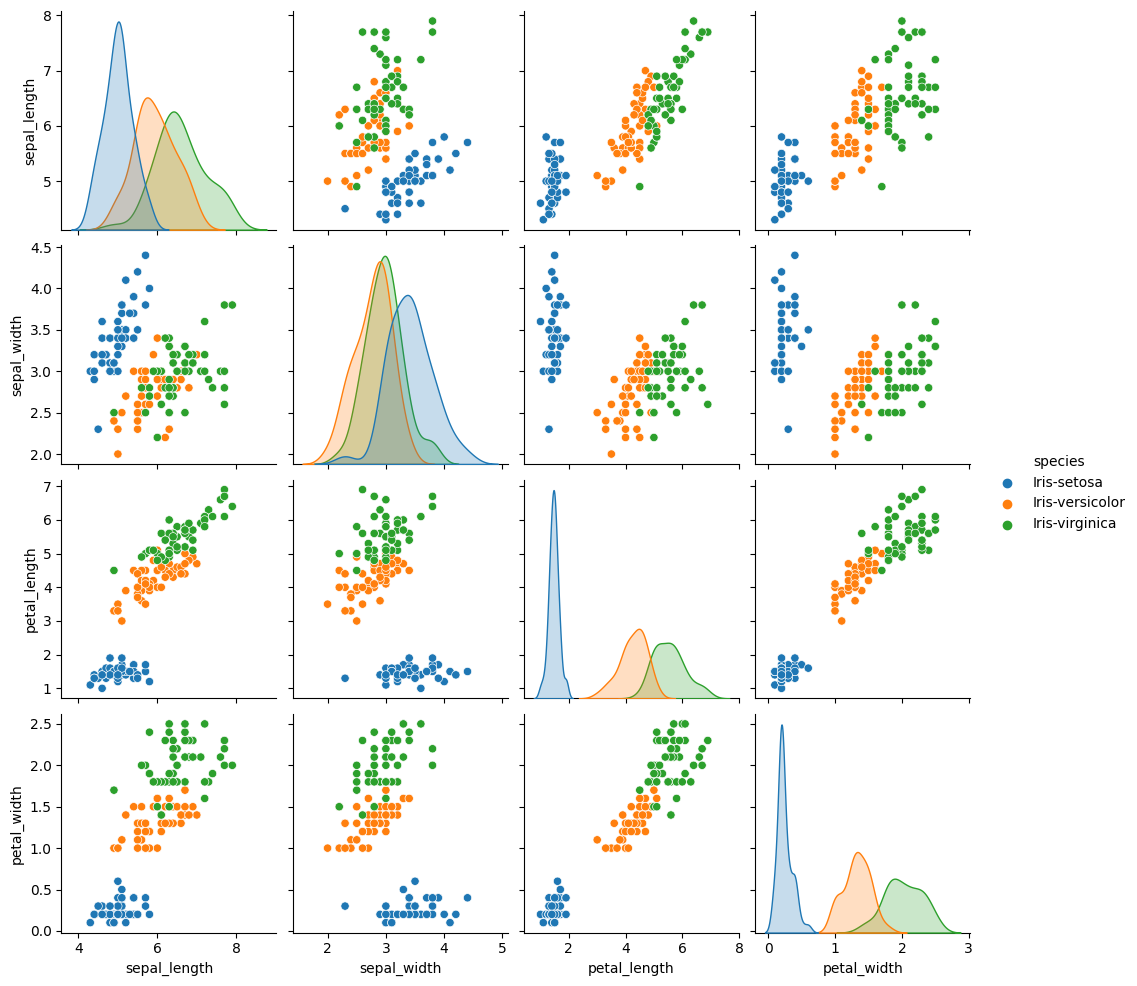

In [8]:
# Pairplot
sns.pairplot(df,hue='species')

In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
df["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [11]:
# Iris-setosa ---> 0
# Iris-versicolor  -----> 1
# Iris-virginica -------> 2
df["species"]=df["species"].replace({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})

Checking Correlation

In [12]:
df.corr()


,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

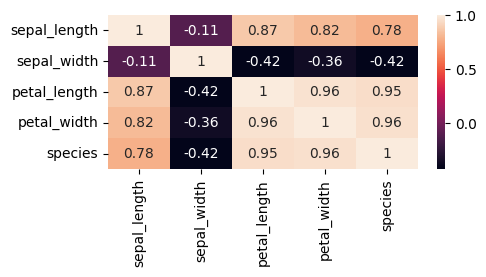

In [13]:
# Using heatmap
plt.figure(figsize=(5, 2))
cor=df.corr()
sns.heatmap(cor,annot=True)

Splitting into dependent and independent variables

In [14]:
x=df.iloc[:,:4]
y=df.iloc[:,-1]
x.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: species
Non-Null Count  Dtype
--------------  -----
150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


**Train_Test_Split**

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=32)

In [16]:
print(x_train.shape)
print(x_test.shape)

(120, 4)
(30, 4)


**KNN Classifier**

In [18]:
model1=KNeighborsClassifier(n_neighbors=3)
model1

KNeighborsClassifier(n_neighbors=3)

In [19]:
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[12  0  0]
 [ 0  9  0]
 [ 0  0  9]]


Logistic Regression

In [20]:
model2=LogisticRegression(max_iter=1000) # Increase the max_iter value
model2

LogisticRegression(max_iter=1000)

In [21]:
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[12  0  0]
 [ 0  9  0]
 [ 0  0  9]]


**Decision Tree Classifier**

In [22]:
model3=DecisionTreeClassifier() # Increase the max_iter value
model3

DecisionTreeClassifier()

In [23]:
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.90      1.00      0.95         9
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

[[12  0  0]
 [ 0  9  0]
 [ 0  1  8]]


**Printing Accuracy Scores for each model**

In [24]:
print("KNN Classifier Accuracy:", accuracy_score(y_test, y_pred1)*100)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred2)*100)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred3)*100)

KNN Classifier Accuracy: 100.0
Logistic Regression Accuracy: 100.0
Decision Tree Accuracy: 96.66666666666667


**Predicting**

In [25]:
# Enter : PetalLengthCm, PetalWidthCm, SepalLengthCm, SepalWidthCm
# Iris-setosa ---> 0
# Iris-versicolor  -----> 1
# Iris-virginica -------> 2
sample_check=[[5.8,2.7,3.9,1.2],
              [7.7,2.8,6.7,2],
              [7.9,3.8,6.4,2],
              [5,3.4,1.5,0.2],
              [4.8,3.4,1.9,0.2]
             ]
for i in sample_check:
    x=model3.predict([i])
    if(x==0):
        print("Iris-setosa")
    elif(x==1):
        print("Iris-versicolor")
    elif(x==2):
        print("Iris-virginica")

Iris-versicolor
Iris-virginica
Iris-virginica
Iris-setosa
Iris-setosa


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
